# Multivariate linear regression

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import seaborn as sns

## Read in dataset

In [2]:
fp = ("health.xlsx")

data = pd.read_excel(fp, sheet_name = "mlr07" )


df_shape = data.shape
headers = list(data)

print (df_shape)
print (headers)

# Define features to be included in the model

# feature_cols = headers
# # feature_cols = headers[1:4]


(53, 5)
['death rate per 1000 residents', 'doctor availability per 100,000 residents', 'hospital availability per 100,000 residents', 'annual per capita income in thousands of dollars', 'opulation density people per square mile']


## Explore the data 

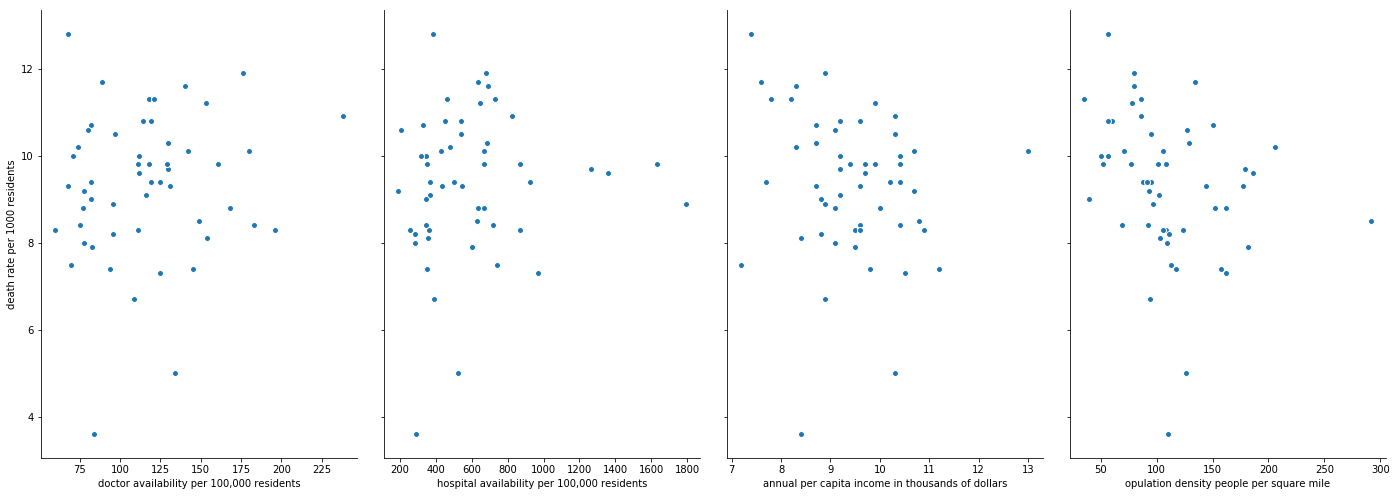

In [3]:
# visualize the relationship between the features and the response using scatterplots
# features = data.iloc[1:, :4]
# label = data['death rate per 1000 residents']

sns.pairplot(data, x_vars=headers[1:len(headers)], y_vars=headers[0], size=7, aspect=0.7)
# sns.pairplot(data, x_vars=features, y_vars=label, size=7, aspect=0.7)

## Pre-process the data

Let's split the data into two arrays: the target variable (the one we're trying to predict, chirps per minute) and the independent variable (temperature)

In [9]:
feature_cols = headers[1:len(headers)]

# Put the independent variables in another array
X = data[feature_cols]

print ('Shape of X: ', X.shape)
print('Headers of X: ', list(X))

# define the target variable
y = data[headers[0]].to_frame()

print ('Shape of y: ', y.shape)
print('Header of y: ', list(y))

Shape of X:  (53, 4)
Headers of X:  ['doctor availability per 100,000 residents', 'hospital availability per 100,000 residents', 'annual per capita income in thousands of dollars', 'opulation density people per square mile']
Shape of y:  (53, 1)
Header of y:  ['death rate per 1000 residents']


Let's also split the data into test and training datasets

In [20]:
# Define what percentage of your data you want to put aside for testing
test_percent = 2

split_num = round((test_percent/100)*df_shape[0])

X_train = X[:-split_num]
y_train = y[:-split_num]

X_test = X[-split_num:]
y_test = y[-split_num:]

## Fit the model

In [21]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [22]:
# Print the model coefficients
print ('Coefficients: ', list(zip(feature_cols, model.coef_[0])))

# Print the model intercept
print('Intercept: ', model.intercept_)


Coefficients:  [('doctor availability per 100,000 residents', 0.007742830487816087), ('hospital availability per 100,000 residents', 0.0004789517170364923), ('annual per capita income in thousands of dollars', -0.3591577220705747), ('opulation density people per square mile', -0.009645878175021301)]
Intercept:  [12.63445394]


## How well does our model perform?

Let's get the R^2 coefficient for our model and see how well it performs on our test data

In [23]:
print ('R^2 score for the model: ', model.score(X_train,y_train))

y_pred = model.predict(X_test)


# RMSE
print('Root mean squared error between y_pred and y_test: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R^2 score for the model:  0.15831630715377065
Root mean squared error between y_pred and y_test:  2.8610397853786003


Some pretty visualizations using seaborn

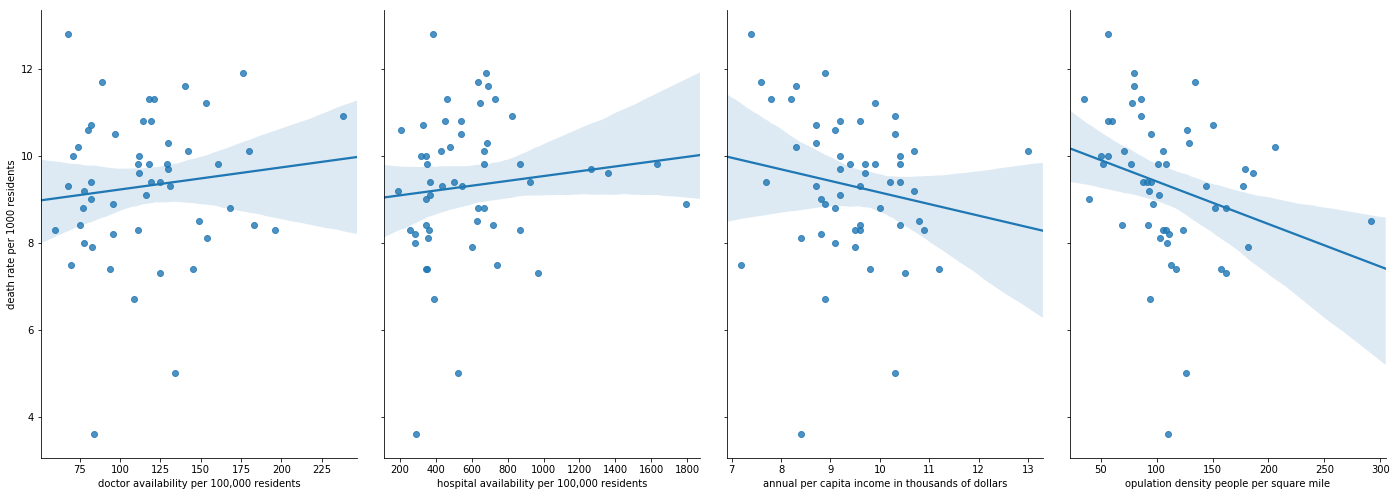

In [24]:
sns.pairplot(data, x_vars=feature_cols, y_vars=headers[0], size=7, aspect=0.7, kind='reg')

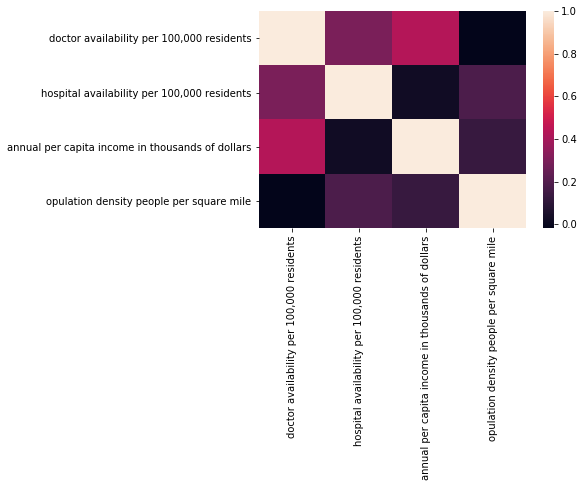

In [25]:
# calculate the correlation matrix
corr = X.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)